<a href="https://colab.research.google.com/github/PabloCaSan/Data-Science-Training/blob/main/Notebook14_SeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nota:** Para esta práctica hay que descargar un archivo csv de Kaggle. Se puede encontrar en el siguiente [enlace](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset)  

Conectamos con nuestro Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Navegamos en Drive hasta la carpeta donde está guardada la base de datos

In [ ]:
%cd /content/drive/MyDrive/Platzi/db 
!ls

/content/drive/MyDrive/Platzi/db
covid_19_data.csv  Meteorite_Landings.csv  test.csv
london_merged.csv  population.csv


Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.3.5'

Leemos los datos y guardamos la línea de código en una variable, para no tener que escribir todo a cada rato

In [ ]:
df = pd.read_csv('covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


Notemos que la columna de "ObservationDate" tiene datos de tipo texto, es conveniente tener datos de tipo tiempo, entonces hagamos la transformación

In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


Ahora vamos a deshacernos de algunas columnas, para poder manejar más facilmente la información

In [ ]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [ ]:
df = df[[
    'ObservationDate',
    'Country/Region',
    'Confirmed',
    'Deaths',
    'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


Ahora hagamos otra tabla, solo para la columna de tiempo, en la que contabilicemos los casos por día

In [ ]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


Ahora hagamos otras dos tablas pero eligiendo únicamente una columna en cada una de ellas, además de restringir la cantidad de datos, usando ".iloc[ ]"

In [ ]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Ua vez hcho esto, podemos usar operadores entre estas dos tablas, por ejemplo, el operador de resta

In [ ]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Notemos que los datos que no comparten índice (en este caso el índice es la fecha), regresan un resultado nulo

Ahora analicemos la tabla de "df_time"

In [ ]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


Vemos que la cantidad de datos ha ido aumentando. Resulta interesante ver qué tanto ha ido aumentando cada día, para ello usaremos la función ".diff"

In [ ]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Esta función toma dos días consecutivos y calcula la diferencia entre ellos

Ahora podríamos por ejemplo, sacar el promedio de estas diferencias

In [ ]:
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

Vemos que en promedio los casos aumentan 344728 por día, las muertes 7167 y los recuperados 217323

Ahora, volviendo a la tabla de diferencias, notemos que el primer valor es nulo, esto se debe a que no hay con qué otro valor restarlo, para solucionar esto, podemos hacer lo siguiente:

Guardamos la tabla de las diferencias en una variable

In [ ]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Localizamos el primer valor de la tabla de tiempo (la que todavía no tiene la diferencia)

In [ ]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0


Lo pasamos a un diccionario

In [ ]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [ ]:
df_diff.fillna({
  'Confirmed': 555.0,
  'Deaths': 17.0,
  'Recovered': 28.0},
  inplace = True)

Vemos que ya no hay variables nulas

In [ ]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Ahora analicemos la tabla pero cada 7 días, para ello usaremos la función ".resample( )"

In [ ]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5576.0,131.0,106.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


Igual se puede hacer para un día en específico, por ejemplo el domingo

In [ ]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2116.0,56.0,54.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-05-02,5680889.0,93206.0,4734311.0
2021-05-09,5459865.0,90258.0,4759410.0
2021-05-16,4739560.0,86338.0,4692644.0


O la suma mensual

In [ ]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9923.0,213.0,223.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


Ahora vemaos qué pasa si hacemos el muestreo por un periodo de tiempo menor, usemos 12 horas

In [ ]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,499934.0,11820.0,554963.0


Notemos que hay renglones con valores cero, esto se debe a que no hay suficientes datos para calcular la suma, así que el programa los rellena con ceros. Podemos hacer que la suma solo se efectúe cuando haya al menos un elemento

In [ ]:
df_diff.resample('12h').sum(min_count=1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,499934.0,11820.0,554963.0


Y de esta manera tenemos números nulos en lugar de ceros

Ahora hagamos esto mismo pero para la tabla de tiempo y guardemos en una variable

In [ ]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Podemos rellenar los espacios en blanco copiando el valor siguiente en la celda donde había un valor nulo

In [ ]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Análogamente podemos rellenar los espacios en blanco copiando el valor anterior en la celda donde había un valor nulo

In [ ]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


O bien podemos reemplazar los valores nulos con el número que queramos

In [ ]:
df_cum.fillna(0)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Pero lo mejor sería interpolar los datos, para hacer una interpolación lineal hacemos

In [ ]:
df_cum.interpolate()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Guardemos lo anterior

In [ ]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Ahora vemos la tasa de supervivencia al COVID-19

In [ ]:
df_cum['rate'] = (1 - df_cum['Deaths']/df_cum['Confirmed'])*100
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,96.947935
2020-01-22 12:00:00,827.0,25.5,45.0,96.916566
2020-01-23 00:00:00,1097.0,34.0,60.0,96.900638
2020-01-23 12:00:00,1019.0,30.0,49.5,97.055937
2020-01-24 00:00:00,941.0,26.0,39.0,97.236982
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,97.921950
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,97.921527
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,97.921106


Ahora haremos que el tiempo ya no sea un índice sino una columna más

In [ ]:
df_cum.reset_index()

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,96.947935
1,2020-01-22 12:00:00,827.0,25.5,45.0,96.916566
2,2020-01-23 00:00:00,1097.0,34.0,60.0,96.900638
3,2020-01-23 12:00:00,1019.0,30.0,49.5,97.055937
4,2020-01-24 00:00:00,941.0,26.0,39.0,97.236982
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,97.921950
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,97.921527
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,97.921106
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,97.920957


Esto nos sirve para agrupar los datos respecto al tiempo. Veamos cómo ha ido cambiando la tasa de supervivencia

In [ ]:
df_cum.groupby(pd.Grouper(level = 'ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,97.424123
2020-02-29,97.356191
2020-03-31,96.004575
2020-04-30,93.532561
2020-05-31,93.319193
2020-06-30,94.571832
2020-07-31,95.708085
2020-08-31,96.433883
2020-09-30,96.852401


Veamos día a día lo anterior y grafiquemos, para tener una mejor idea

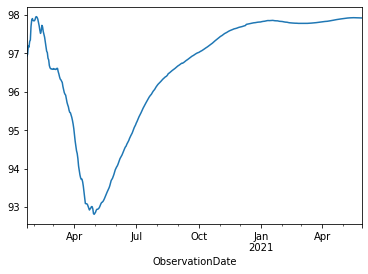

In [ ]:
sr = df_cum.groupby(pd.Grouper(level = 'ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

podemos suavizar la gráfica usando la función rolling. Vamos a especificar que haga es promedio cada 7 días

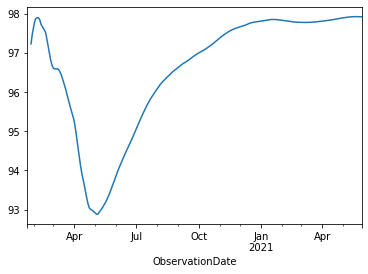

In [ ]:
sr.rolling(window=7).mean().plot()

Comparemos el suavizado con la originar y con un suavizado de 14 días

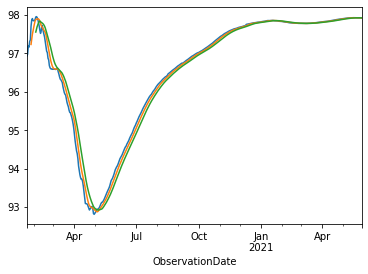

In [ ]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

Ahora veamos cómo es la desviación estándar en el suavizado de 14 días

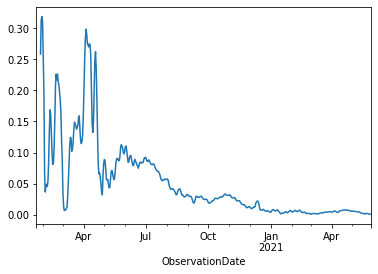

In [ ]:
sr.rolling(window=7).std().plot()

Ahora nos preguntamos cuál es el país con más ocurrencias de COVID. Para responder esto, agrupamos por país

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

Vemos que Francia aparece hasta arriba, entonces analicemos este país. Para ello, primero hagamos una nueva variable

In [ ]:
df_time = df.groupby(['Country/Region', 
            pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

Y ahora restringimos solo a Francia

In [ ]:
df_francia = df_time.loc['France',:]
df_francia

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
2020-01-27,3.0,0.0,0.0
2020-01-28,4.0,0.0,0.0
...,...,...,...
2021-05-25,5670486.0,109040.0,386798.0
2021-05-26,5683143.0,109185.0,388128.0
2021-05-27,5697076.0,109327.0,389105.0


Grafiquemos estos datos

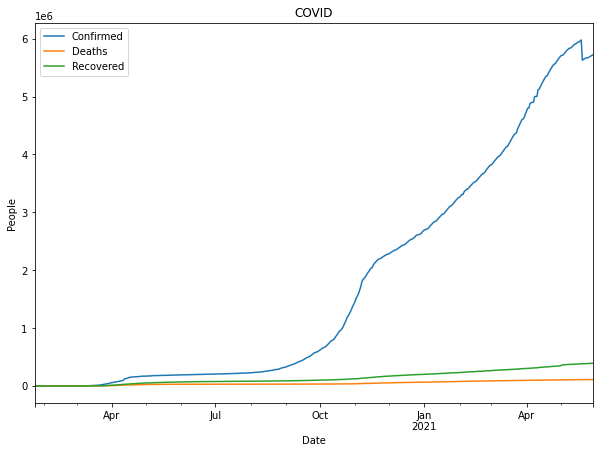

In [ ]:
df_francia.plot(figsize = (10,7), title = 'COVID') # figsize se usa para el tamaño de la gráfica, title se usa para poner un título
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

Podemos editar los datos de la leyenda como sigue:

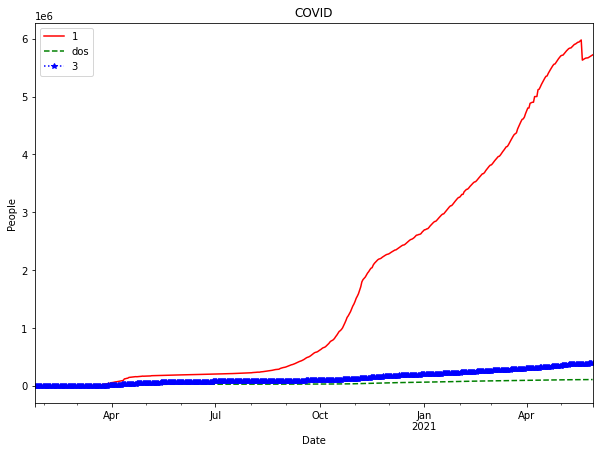

In [ ]:
ax = df_francia.plot(figsize = (10,7), title = 'COVID',
                     legend=False, style = ['r-', 'g--', 'b:*']) 
ax.legend(['1', 'dos', '3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

Ahora veamos esto pero para cada mes

In [ ]:
df_monthly = df_francia.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,5.0,0.0,0.0
2020-02-29,100.0,2.0,12.0
2020-03-31,52278.0,3526.0,9513.0
2020-04-30,169098.0,24380.0,50380.0
2020-05-31,190975.0,28805.0,68473.0
2020-06-30,204244.0,29846.0,76399.0
2020-07-31,227239.0,30268.0,81764.0
2020-08-31,321160.0,30646.0,86790.0
2020-09-30,605893.0,31978.0,98632.0


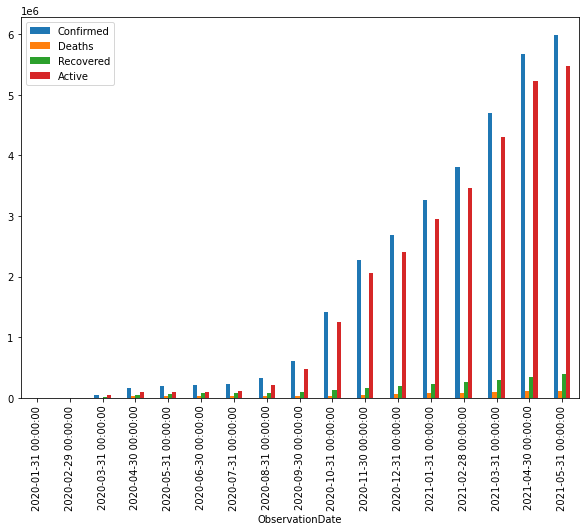

In [ ]:
df_monthly.plot(figsize = (10,7), kind='bar')

Otra forma de gráfica es juntar la barra de confirmados, la de muertes y la de recuperados en unsa sola barra

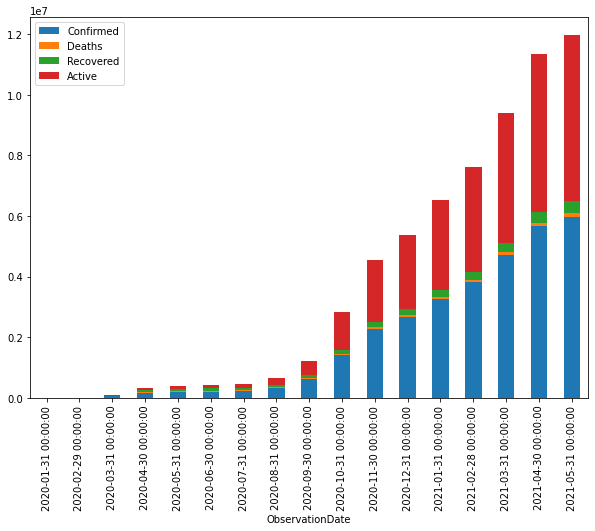

In [ ]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked=True)

Ahora, en la tabla hagamos una nueva columna, para los casos activos, es decir, aquellos confirmados que no han muerto ni se han recuperado

In [ ]:
df_monthly['Active'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-31,5.0,0.0,0.0,5.0
2020-02-29,100.0,2.0,12.0,86.0
2020-03-31,52278.0,3526.0,9513.0,39239.0
2020-04-30,169098.0,24380.0,50380.0,94338.0
2020-05-31,190975.0,28805.0,68473.0,93697.0
2020-06-30,204244.0,29846.0,76399.0,97999.0
2020-07-31,227239.0,30268.0,81764.0,115207.0
2020-08-31,321160.0,30646.0,86790.0,203724.0
2020-09-30,605893.0,31978.0,98632.0,475283.0


Hagamos una gráfica de pastel

In [ ]:
df_monthly_trim = df_monthly.tail(3)
df_monthly_trim

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2021-03-31,4705068.0,95798.0,301467.0,4307803.0
2021-04-30,5677835.0,104675.0,346480.0,5226680.0
2021-05-31,5978650.0,109518.0,390878.0,5478254.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec220c98d0>,
      dtype=object)

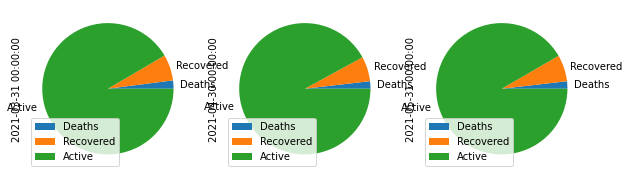

In [ ]:
df_monthly_trim[['Deaths', 'Recovered', 'Active']].T.plot(figsize = (10,7), kind = 'pie', subplots = True)

Resulta interesante ver la tasa de supervivencia

In [ ]:
df_francia['Rate'] = (1 - df_francia['Deaths']/df_francia['Confirmed'])*100
df_francia

,Confirmed,Deaths,Recovered,Rate
ObservationDate,,,,
2020-01-24,2.0,0.0,0.0,100.000000
2020-01-25,3.0,0.0,0.0,100.000000
2020-01-26,3.0,0.0,0.0,100.000000
2020-01-27,3.0,0.0,0.0,100.000000
2020-01-28,4.0,0.0,0.0,100.000000
...,...,...,...,...
2021-05-25,5670486.0,109040.0,386798.0,98.077061
2021-05-26,5683143.0,109185.0,388128.0,98.078792
2021-05-27,5697076.0,109327.0,389105.0,98.080998


Ahora hagamos un histograma de la tasa d supervivencia (Rate)

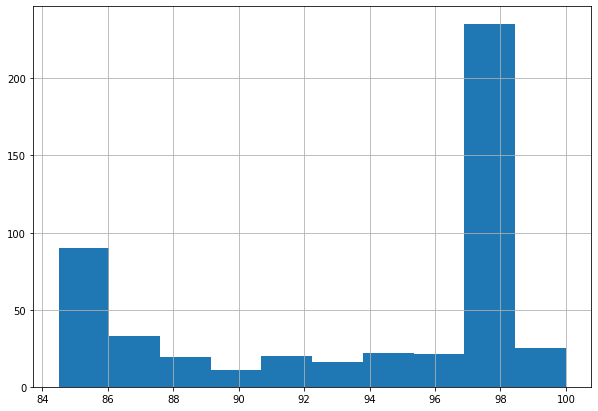

In [ ]:
df_francia['Rate'].hist(figsize = (10,7), bins=10)

Esta es la variación de la tasa de supervivencia, vemos que la mayoría se acumula cerca del 98%

Ahora veamos cómo es la distribución

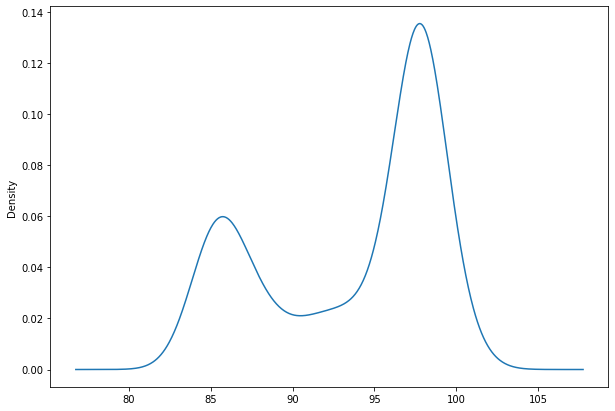

In [ ]:
df_francia['Rate'].plot(kind = 'kde', figsize = (10,7))